# Taller 6

- Daniela Martínez Quiroga
- María Isabella Rodríguez Arévalo

#Instalar librerías

In [ ]:
!pip install -U gradio

# Importar librerías

In [ ]:
import pandas as pd
import sklearn
import gradio as gr
import tabulate
import matplotlib.pyplot as plt
import requests

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Punto 1 - Cancer

## Dataset y limpieza

In [ ]:
df = pd.read_csv('cancer.csv')
print(df.head())

x = df.drop('Diagnosis',axis=1)
x.fillna(x.mean(), inplace=True)
y = df['Diagnosis']
le = LabelEncoder()
y = le.fit_transform(y)

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

## Datos de entrenamiento y pruebas

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y)

## Entrenamiento del modelo

### Primer modelo

In [ ]:
per_op1 = MLPClassifier(learning_rate_init=0.001, alpha=0.0001, hidden_layer_sizes=(100,), activation='relu', solver='adam', early_stopping=True)

per_op1.fit(x_train,y_train)

MLPClassifier(early_stopping=True)

### Validación cruzada: GridSearchCV

In [ ]:
param = {
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'hidden_layer_sizes': [(100,), (50,50), (100,50,25)],
    'activation': ['identity', 'relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd']
}

per_op2 = MLPClassifier(max_iter=500)

per_op2_grid = RandomizedSearchCV(per_op2, param, cv=3, scoring='accuracy', n_iter=10, random_state=42)

per_op2_grid.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=MLPClassifier(max_iter=500),
                   param_distributions={'activation': ['identity', 'relu',
                                                       'tanh', 'logistic'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(100,), (50, 50),
                                                               (100, 50, 25)],
                                        'learning_rate_init': [0.0001, 0.001,
                                                               0.01, 0.1],
                                        'solver': ['adam', 'sgd']},
                   random_state=42, scoring='accuracy')

### Accuracy y F1

In [ ]:
y_beanie1_t = per_op1.predict(x_test)
y_beanie1_tr  = per_op1.predict(x_train)
y_beanie2_t = per_op2_grid.predict(x_test)
y_beanie2_tr = per_op2_grid.predict(x_train)

accuracy1_t = accuracy_score(y_test, y_beanie1_t)
f1_1t = f1_score(y_test, y_beanie1_t, average='weighted')
accuracy1_tr = accuracy_score(y_train, y_beanie1_tr)
f1_1tr = f1_score(y_train, y_beanie1_tr, average='weighted')

accuracy2_t = accuracy_score(y_test, y_beanie2_t)
f1_2t = f1_score(y_test, y_beanie2_t, average='weighted')
accuracy2_tr = accuracy_score(y_train, y_beanie2_tr)
f1_2tr = f1_score(y_train, y_beanie2_tr, average='weighted')

Tabla comparativa

In [ ]:
data_info = {
    "Models": ["Model 1", "Model 2"],
    "Accuracy test": [accuracy1_t, accuracy2_t],
    "Accuracy train": [accuracy1_tr, accuracy2_tr],
    "F1 test": [f1_1t, f1_2t],
    "F1 train": [f1_1tr, f1_2tr],
}

data_hiperparameters = {
    "Models": ["Model 1", "Model 2"],
    "learning_rate_init": [0.001, per_op2_grid.best_params_['learning_rate_init']],
    "alpha": [0.0001, per_op2_grid.best_params_['alpha']],
    "hidden_layer_sizes": [(100,), per_op2_grid.best_params_['hidden_layer_sizes']],
    "activation": ["relu", per_op2_grid.best_params_['activation']],
    "solver": ["adam", per_op2_grid.best_params_['solver']]
}
df_tabla = pd.DataFrame(data_info)
df_hiper = pd.DataFrame(data_hiperparameters)
print(df_tabla)
print(df_hiper)

    Models  Accuracy test  Accuracy train   F1 test  F1 train
0  Model 1       0.859649        0.904523  0.856835  0.904101
1  Model 2       0.900585        0.927136  0.899699  0.926756
    Models  learning_rate_init   alpha hidden_layer_sizes activation solver
0  Model 1               0.001  0.0001             (100,)       relu   adam
1  Model 2               0.001  0.0001      (100, 50, 25)       relu   adam


### Análisis de hiperpárametros
Teniendo en cuenta que que accuracy en los datos de prueba tiene una diferencia aproximada de 0.1, el accuracy en los datos de entrenamiento tiene una diferencia aproximada de 0.2, el f1 en los datos de prueba tiene una diferencia aproximada de 0.1 y en f1 en los datos de entrenamiento la diferencia es aproximada de 0.2- Teniendo en cuenta esto, el mejor modelo es el número 2 al acercarse más a 1 en todos sus accuracy y f1. Eso quiere decir que en este dataset usar un learning rate en 0.1 es mejor que uno de 0.001. Al combinarlo con un alpha de 0.1 permite una mayor precisión y f1. Por ahora, consideramos que hidden layer y solver no tiene una mayor influencia ya que son los mismos en ambos modelos. El otro hiperparámetro con influencia es activation. Por lo mismo, se puede decir que la mejor combinación es 0.1, 0.1 y identity al conseguir los mejores datos

### Preproseciamiento

In [ ]:
#Escalar los datos
x_minmax = MinMaxScaler()
x_train_minmax = x_minmax.fit_transform(x_train)
x_test_minmax = x_minmax.fit_transform(x_test)

#Entrenar los modelos
per_op1_minmax = per_op1.fit(x_train_minmax, y_train)
per_op2_minmax = per_op2_grid.fit(x_train_minmax, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
#Predecir los datos
y_beanie1_t_mm = per_op1_minmax.predict(x_test_minmax)
y_beanie1_tr_mm = per_op1_minmax.predict(x_train_minmax)
y_beanie2_t_mm = per_op2_minmax.predict(x_test_minmax)
y_beanie2_tr_mm = per_op2_minmax.predict(x_train_minmax)

#Accuracy y f1
accuracy1_t_mm = accuracy_score(y_test, y_beanie1_t_mm)
f1_1t_mm = f1_score(y_test, y_beanie1_t_mm, average='weighted')
accuracy1_tr_mm = accuracy_score(y_train, y_beanie1_tr_mm)
f1_1tr_mm = f1_score(y_train, y_beanie1_tr_mm, average='weighted')

accuracy2_t_mm = accuracy_score(y_test, y_beanie2_t_mm)
f1_2t_mm = f1_score(y_test, y_beanie2_t_mm, average='weighted')
accuracy2_tr_mm = accuracy_score(y_train, y_beanie2_tr_mm)
f1_2tr_mm = f1_score(y_train, y_beanie2_tr_mm, average='weighted')

In [ ]:
data_info_mm = {
    "Models": ["Model 1", "Model 2", "Model 1 minmax", "Model 2 minmax"],
    "Accuracy test": [accuracy1_t, accuracy2_t, accuracy1_t_mm, accuracy2_t_mm],
    "Accuracy train": [accuracy1_tr, accuracy2_tr, accuracy1_tr_mm, accuracy2_tr_mm],
    "F1 test": [f1_1t, f1_2t, f1_1t_mm, f1_2t_mm],
    "F1 train": [f1_1tr, f1_2tr, f1_1tr_mm, f1_2tr_mm],
}

data_hiperparameters_mm = {
    "Models": ["Model 1", "Model 2", "Model 1 minmax", "Model 2 minmax"],
    "learning_rate_init": [0.001, per_op2_grid.best_params_['learning_rate_init'], 0.001, per_op2_minmax.best_params_['learning_rate_init']],
    "alpha": [0.0001, per_op2_grid.best_params_['alpha'],0.0001, per_op2_grid.best_params_['alpha']],
    "hidden_layer_sizes": [(100,), per_op2_minmax.best_params_['hidden_layer_sizes'], (100,), per_op2_minmax.best_params_['hidden_layer_sizes']],
    "activation": ["relu", per_op2_grid.best_params_['activation'], "relu", per_op2_minmax.best_params_['activation']],
    "solver": ["adam", per_op2_grid.best_params_['solver'], "adam", per_op2_minmax.best_params_['solver']]
}
df_tabla_mm = pd.DataFrame(data_info_mm)
df_hiper_mm = pd.DataFrame(data_hiperparameters_mm)
print(df_tabla_mm)
print(df_hiper_mm)

           Models  Accuracy test  Accuracy train   F1 test  F1 train
0         Model 1       0.859649        0.904523  0.856835  0.904101
1         Model 2       0.900585        0.927136  0.899699  0.926756
2  Model 1 minmax       0.947368        0.907035  0.946899  0.904751
3  Model 2 minmax       0.842105        1.000000  0.844459  1.000000
           Models  learning_rate_init   alpha hidden_layer_sizes activation  \
0         Model 1               0.001  0.0001             (100,)       relu   
1         Model 2               0.001  0.0001      (100, 50, 25)       relu   
2  Model 1 minmax               0.001  0.0001             (100,)       relu   
3  Model 2 minmax               0.001  0.0001      (100, 50, 25)       relu   

  solver  
0   adam  
1   adam  
2   adam  
3   adam  


### Visualización

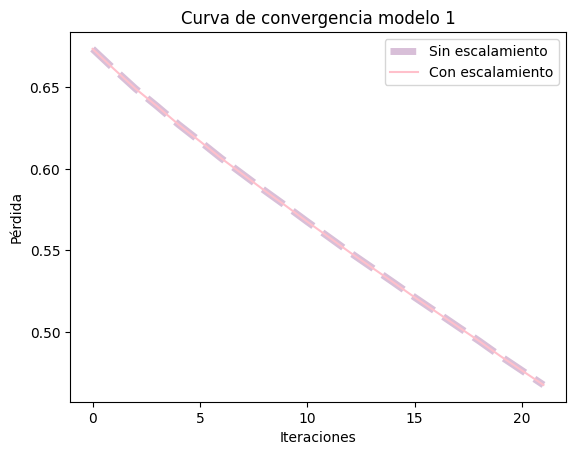

In [ ]:
plt.plot(per_op1.loss_curve_, label="Sin escalamiento", linestyle="dashed", linewidth=5, color="#D8BFD8")
plt.plot(per_op1_minmax.loss_curve_, label="Con escalamiento", color="#FFC0CB")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.legend()
plt.title("Curva de convergencia modelo 1")
plt.show()

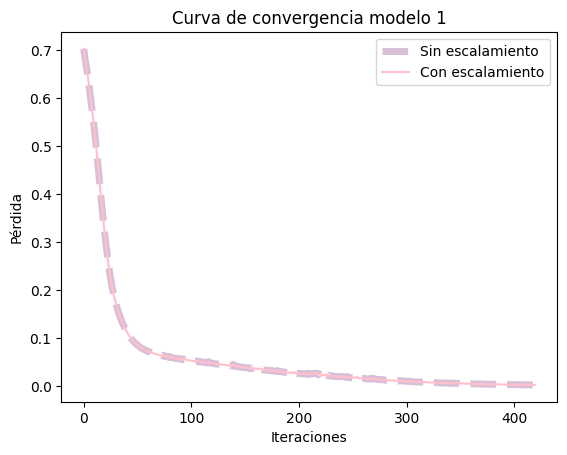

In [ ]:
plt.plot(per_op2_grid.best_estimator_.loss_curve_, label="Sin escalamiento", linestyle="dashed", linewidth=5, color="#D8BFD8")
plt.plot(per_op2_minmax.best_estimator_.loss_curve_, label="Con escalamiento", color="#FFC0CB")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.legend()
plt.title("Curva de convergencia modelo 1")
plt.show()

### Tabla compartiva ensambles

Los elementos que contiene un "(e)" singifica que son del taller pasado de ensambles



In [ ]:
data_info_ens = {
    "Models": ["Model 1", "Model 2", "Model 1 minmax", "Model 2 minmax", "RandomForest(e)", "GradientB(e)", "Voting(e)", "Stacking(e)"],
    "Accuracy test": [accuracy1_t, accuracy2_t, accuracy1_t_mm, accuracy2_t_mm, 0.9415, 0.9474,0.9357,0.9357],
    "Accuracy train": [accuracy1_tr, accuracy2_tr, accuracy1_tr_mm, accuracy2_tr_mm, 1.000, 1.000, 0.9447, 0.9925],
    "F1 test": [f1_1t, f1_2t, f1_1t_mm, f1_2t_mm, 0.9545,0.9589,0.9511,0.9498],
    "F1 train": [f1_1tr, f1_2tr, f1_1tr_mm, f1_2tr_mm, 1.000,1.000,0.9577,0.9940],
}

df_info_ens = pd.DataFrame(data_info_ens)
print(df_info_ens)

            Models  Accuracy test  Accuracy train   F1 test  F1 train
0          Model 1       0.859649        0.904523  0.856835  0.904101
1          Model 2       0.900585        0.927136  0.899699  0.926756
2   Model 1 minmax       0.947368        0.907035  0.946899  0.904751
3   Model 2 minmax       0.842105        1.000000  0.844459  1.000000
4  RandomForest(e)       0.941500        1.000000  0.954500  1.000000
5     GradientB(e)       0.947400        1.000000  0.958900  1.000000
6        Voting(e)       0.935700        0.944700  0.951100  0.957700
7      Stacking(e)       0.935700        0.992500  0.949800  0.994000


# Ejercicio 2

## Carga y limpieza de datos

In [ ]:
# Cargar datos desde GitHub
url = "https://raw.githubusercontent.com/oscar-bustos/javeriana-analitica/main/housing/train.csv"
df = pd.read_csv(url)

# Separar características y variable objetivo
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Identificar columnas categóricas y numéricas
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(include=['number']).columns

# Rellenar valores nulos
x[numerical_cols] = x[numerical_cols].fillna(x[numerical_cols].mean())  # Para numéricas
x[categorical_cols] = x[categorical_cols].fillna(x[categorical_cols].mode().iloc[0])  # Para categóricas

# Convertir variables categóricas a variables numéricas (One-Hot Encoding)
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)  # Evita colinealidad

# Verificar que no haya valores categóricos después de la transformación
print("Tipos de datos después de get_dummies:\n", x.dtypes.value_counts())

# Dividir en entrenamiento (70%) y prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f'Tamaño de x_train: {x_train.shape}')
print(f'Tamaño de x_test: {x_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Tipos de datos después de get_dummies:
 bool       208
int64       34
float64      3
Name: count, dtype: int64
Tamaño de x_train: (1022, 245)
Tamaño de x_test: (438, 245)
Tamaño de y_train: (1022,)
Tamaño de y_test: (438,)


## Modelo MLP

In [ ]:
# Definir hiperparámetros para la búsqueda aleatoria
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Crear el modelo base
mlp = MLPRegressor(max_iter=5000, random_state=42)

# Búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    mlp, param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones a probar (ajústalo según el tiempo disponible)
    cv=3, scoring='neg_mean_squared_error',
    n_jobs=-1, verbose=2, random_state=42
)

# Entrenar la búsqueda de hiperparámetros
random_search.fit(x_train, y_train)

# Obtener el mejor modelo
best_mlp = random_search.best_estimator_

print("Mejor combinación de hiperparámetros:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejor combinación de hiperparámetros: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'relu'}


## Métricas

In [ ]:
# Predicciones en el conjunto de entrenamiento (desarrollo)
y_train_pred = best_mlp.predict(x_train)

# Predicciones en el conjunto de prueba
y_test_pred = best_mlp.predict(x_test)

# Cálculo de métricas en entrenamiento (desarrollo)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Cálculo de métricas en prueba
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Mostrar métricas
print("MÉTRICAS EN ENTRENAMIENTO (DESARROLLO):")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"R² Score: {r2_train:.4f}")

print("\nMÉTRICAS EN PRUEBA:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R² Score: {r2_test:.4f}")

MÉTRICAS EN ENTRENAMIENTO (DESARROLLO):
Mean Squared Error (MSE): 1651863763.80
Mean Absolute Error (MAE): 26071.28
R² Score: 0.7255

MÉTRICAS EN PRUEBA:
Mean Squared Error (MSE): 1538584088.76
Mean Absolute Error (MAE): 26175.67
R² Score: 0.7795


## Interfaz con Gradio

In [ ]:
import gradio as gr
import requests

# URL del archivo en GitHub
data_file_url = "https://raw.githubusercontent.com/oscar-bustos/javeriana-analitica/main/housing/data_description.txt"

# Función para leer el archivo desde el enlace y extraer variables con sus valores
def parse_file_from_url(url):
    fields = {}

    # Descargar archivo
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Error al descargar el archivo: {response.status_code}")

    # Leer líneas del archivo
    lines = response.text.split("\n")

    current_field = None
    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Si la línea contiene ":", es el nombre de una variable
        if ":" in line:
            field_name = line.split(":")[0].strip()
            fields[field_name] = []  # Se inicializa como lista vacía
            current_field = field_name
        elif current_field:
            # Intentar separar el identificador del significado
            parts = line.split("\t")
            if len(parts) >= 2:
                key = parts[0].strip()
                fields[current_field].append(key)  # Agregar solo el identificador correcto

    return fields

# Obtener las variables y sus posibles valores
fields = parse_file_from_url(data_file_url)

# Crear los componentes dinámicamente en Gradio
inputs = []
for field, options in fields.items():
    if options:  # Si tiene opciones, usar Dropdown
        inputs.append(gr.Dropdown(choices=options, label=field))
    else:  # Si no tiene opciones, usar un campo de texto rellenable
        inputs.append(gr.Textbox(label=field))

# Función de predicción con el modelo best_mlp
def predict_price(**kwargs):
    input_data = pd.DataFrame([kwargs])

    # Asegurar que los valores numéricos sean correctos
    for col in numerical_cols:
        input_data[col] = pd.to_numeric(input_data[col], errors='coerce')

    # One-Hot Encoding para variables categóricas
    input_data = pd.get_dummies(input_data, columns=categorical_cols)

    # Asegurar que las columnas coincidan con el modelo
    missing_cols = set(df.drop(columns="SalePrice").columns) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0  # Agregar columnas faltantes con valor 0

    # Reordenar columnas para que coincidan con el entrenamiento
    input_data = input_data[df.drop(columns="SalePrice").columns]

    # Hacer la predicción
    prediction = best_mlp.predict(input_data)[0]

    return f"📊 Predicción de precio: ${prediction:,.2f}"

# Crear la interfaz en Gradio
iface = gr.Interface(fn=predict_price, inputs=inputs, outputs="text")
iface.launch()


/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1024: UserWarning: Expected 0 arguments for function <function predict_price at 0x7f2574778b80>, received 83.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1032: UserWarning: Expected maximum 0 arguments for function <function predict_price at 0x7f2574778b80>, received 83.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://eba338073be8ac8e64.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Preprocesamiento

En la gráfica de la izquierda, la dispersión es mayor y hay predicciones muy alejadas, lo que indica que el modelo sin escalado tiene errores considerables. En la gráfica de la derecha, los puntos están más alineados con la línea roja, lo que sugiere que el escalado mejoró la precisión del modelo.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


R2 Score en entrenamiento (escalado): 0.9420
R2 Score en prueba (escalado): 0.8662


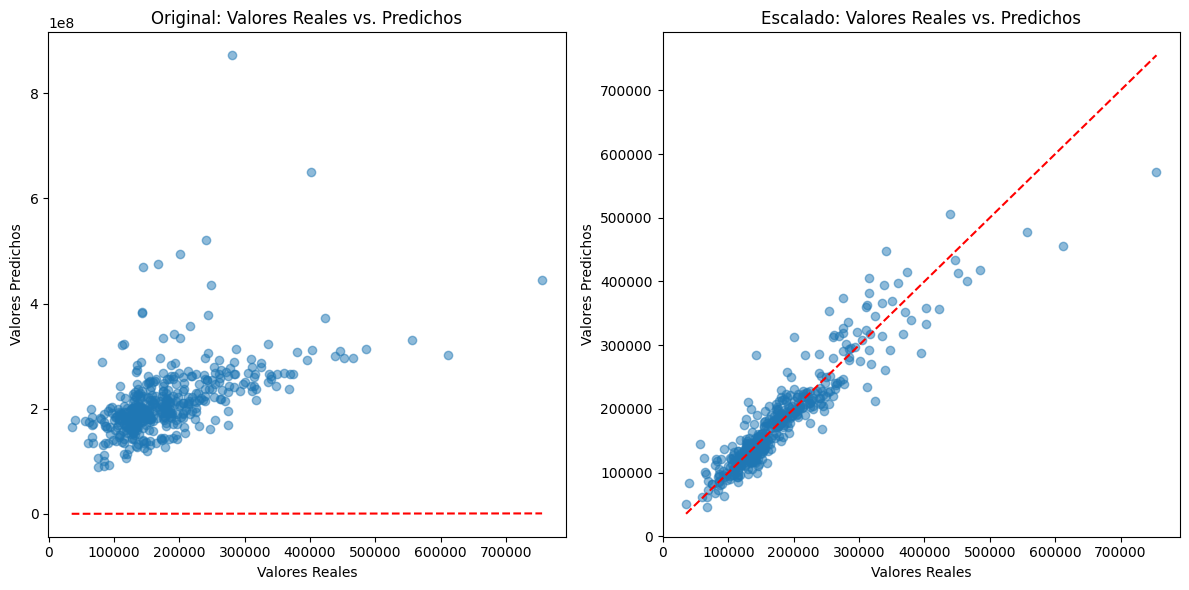

In [ ]:
# Escalar características numéricas
scaler_x = MinMaxScaler()
x_train_minmax = scaler_x.fit_transform(x_train)
x_test_minmax = scaler_x.transform(x_test)

# Predicción con el modelo best_mlp original
y_pred_test_original = best_mlp.predict(x_test)

# Entrenar el modelo best_mlp con datos escalados
best_mlp.fit(x_train_minmax, y_train)

# Hacer predicciones con datos escalados
y_pred_train_scaled = best_mlp.predict(x_train_minmax)
y_pred_test_scaled = best_mlp.predict(x_test_minmax)

# Calcular R2
r2_train_scaled = r2_score(y_train, y_pred_train_scaled)
r2_test_scaled = r2_score(y_test, y_pred_test_scaled)
print(f'R2 Score en entrenamiento (escalado): {r2_train_scaled:.4f}')
print(f'R2 Score en prueba (escalado): {r2_test_scaled:.4f}')

# Visualización de valores reales vs. predichos
plt.figure(figsize=(12, 6))

# Gráfico de predicciones originales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test_original, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Original: Valores Reales vs. Predichos')

# Gráfico de predicciones escaladas
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_scaled, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Escalado: Valores Reales vs. Predichos')

plt.tight_layout()
plt.show()

## Comparación con Ensambles

La tabla indica que en datos de entrenamiento, el mejor modelo fue XGBoost, y en datos de prueba el mejor fue Gradient Boosting.

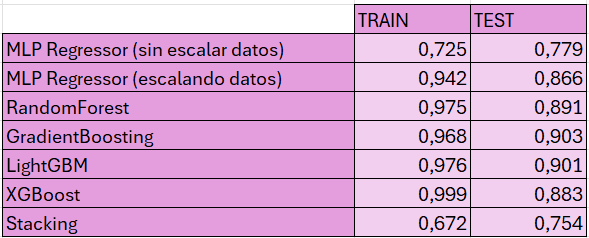